In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [2]:
data=pd.read_excel('SA.xlsx') 
data = data[['text','sentiment']]

In [5]:
##Limpieza de texto
import re 
def clean_text (df, text_field): 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'https://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', ' ', elem ))   
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'publici(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'publicidad', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'@wom(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'wom', elem ))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'wom(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'wom', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'@entel(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+' , 'entel', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'@movistar(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'movistar', elem))
    df [text_field] = df [text_field].str.lower() 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:á)', 'a', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:é)', 'e', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:í)', 'i', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:ó)', 'o', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:ú)', 'u', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:ll)', 'yxy', elem))#guardar las ll 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:rr)', 'yxr', elem))#guardar las rr 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(.)\1+', r'\1', elem))#saca letras repetidas
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:yxy)', 'll', elem))#devuelve  la ll
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:yxr)', 'rr', elem))#devuelve  la rr
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:bkn)', 'buena', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:rt )', ' ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?: q )', ' que ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?: k )', ' que ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:guena)', ' buena ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:wena)', ' buena ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:\\n)', ' ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'jajaja(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'jajaja', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'ajaja(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'jajaja', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[😂,🤣,😅])', ' jajaja ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[😁,😎,😊,😘,🙈,🤭,😋,😄,😆])', ' bien ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[😡,😠,😒,🤬])', ' enojo ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[😭,😢,😪,😞,😔,😫,😌,😩])', ' pena ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[🍄,🤦,🤦,🤦🏼,🤦,😤,😕,💩,😖,🤮,🐌,🖕,😑,💔,👎🏻])', 'pesimo ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[❤️,💓,💕,💜,😍])', ' encanta ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[👏])', ' bravo ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:@[\w_]+)', ' ', elem)) #quita las menciones 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'[^\w\ \s]','', elem)) #quita los emoticones (Deja solo letras y espacios)
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'\b(\w+)( \1\b)+', r'\1', elem))#elimina repetidos
    return df 
data=clean_text(data,'text')
#quitar neutros 
train = data[data.sentiment != 'Neutro']

Positive words


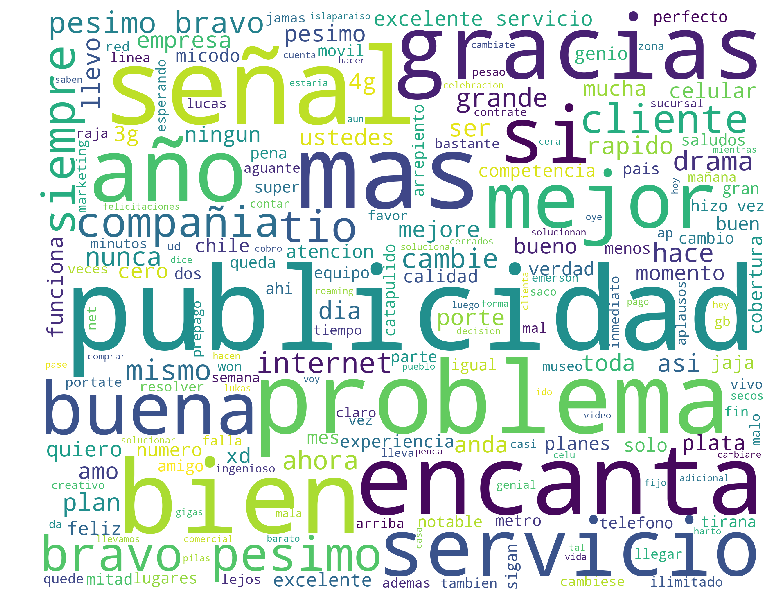

Negative words


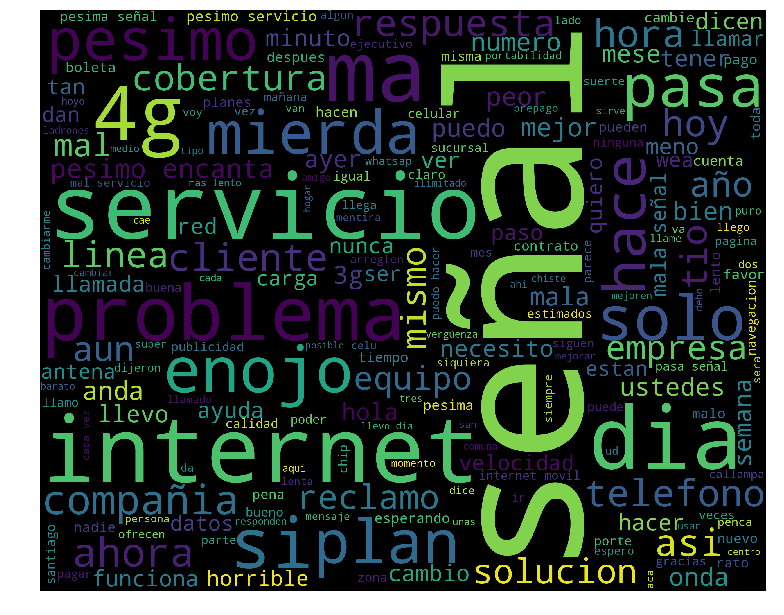

In [6]:
train_pos = train[train['sentiment'] == 'Bueno ']
train_pos = train_pos['text']
train_neg = train[train['sentiment'] == 'Malo']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('jajaja')
                                and not word.startswith('movistar')
                                and not word.startswith('entel')
                                and not word.startswith('wom')
                                and word != 'RT'])
    wordcloud = WordCloud(stopwords=stopwords.words('spanish'),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)